# OPA Assessment Analysis: Sales Ratio Studies

**By:** Nick Hand and Matthew Vegari<br>
**Date:** 1/15/19

This notebook details part of the analysis conducted by the Office of the City Controller presented in **link to report**.

The Office of the City Controller analyzed the accuracy and fairness of Philadelphia's property assessments, which are certified by the Office of Property Assessment (OPA) each March. We conducted a "sales ratio study," the [industry standard](https://www.iaao.org/media/standards/Standard_on_Ratio_Studies.pdf) for comparing assessments to recent, market-value property sales. We analyzed single-family, residential property assessments from 2014 to 2019 (the most recent assessments) and examined assessments both citywide and in 14 smaller geographic zones, meant to represent housing sub-markets in Philadelphia.

The analysis presented here adheres to the methodology standards recommended by the [International Association of Assessing Officers](https://www.iaao.org/) (IAAO). 

**What We Found**
* From 2014 to 2018, assessments for the city as a whole have been outside the acceptable bounds for accuracy and fairness, according to industry standards. However, our findings indicate that the assessments have improved each year, and the 2019 assessments are within the acceptable range.
* Our citywide findings diverge materially from the metrics reported by the OPA for 2014 to 2017, and additional transparency on the part of the OPA is required to fully validate its own self-reported performance metrics. 
* A geographic analysis focused on smaller areas of the city shows that the 2019 assessments for West and North Philadelphia are not within industry standards. The assessments in these areas are not uniform and less expensive homes tend to be over-assessed, while more expensive homes are under-assessed. These areas of the city also have the lowest median incomes, according to data from the 2013 - 2017 ACS US Census data.

### Configuration

Load the software packages we will need.

In [1]:
import os
import pandas as pd
import numpy as np
import holoviews as hv
import geoviews as gv
import geopandas as gpd

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
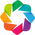

In [2]:
hv.extension('bokeh')

# 1. Analysis Software

In this section, we define the functions needed to perform the sales ratio study. 

### Define the Performance Metrics

**The Coefficient of Dispersion (COD)**

A measure of uniformity, the COD gives the average difference between assessed values and their corresponding sale prices. A COD between 5 and 15 is recommended by the IAAO for a municipality such as Philadelphia. For example, a COD of 15 means that, on average, assessments diverge from their sale prices by 15 percent.

In [3]:
def calculate_COD(assessed_values, sale_prices):
    """
    Compute the coefficient of dispersion, which gives the mean
    absolute deviation (as a percent) from the median ratio.
    
    Here, ratio refers to the ratio of assessed value to sale price.

    Parameters
    ----------
    assessed_values : array_like 
        the array of assessed values
    sale_prices : array_like 
        the array of sale prices
    """
    ratios = assessed_values / sale_prices
    median = np.median(ratios)
    return np.mean(abs(ratios-median)) / median * 100

**The Price-Related Differential (PRD)**

A meausure of fairness, the PRD indicates if the accuracy of assessments depends upon the sale price of the property. A PRD between 0.98 and 1.03 is recommended by the IAAO. A PRD less than 1 means that assessments are *progressive* and lower priced homes are under-assessed relative to higher priced homes. Conversely, a PRD greater than 1 shows that assessments are *regressive* and lower priced homes tend to be over-assessed.

In [4]:
def calculate_PRD(assessed_values, sale_prices):
    """
    Compute the price-related differential, equal to the mean ratio divided by
    the mean ratio weighted by sale price.

    Here, ratio refers to the ratio of assessed value to sale price.
    
    Parameters
    ----------
    assessed_values : array_like 
        the array of assessed values
    sale_prices : array_like 
        the array of sale prices
    """
    ratios = assessed_values / sale_prices
    weighted_mean = np.average(ratios, weights=sale_prices)
    return np.mean(ratios) / weighted_mean

### Specifying the Range of Sale Dates

When comparing sale prices to assessments, we must define the range of sale dates to consider. To best match the OPA's stated methodology in its City Council testimony, we only include sales that occurred in the 3 1/2 years prior to the certification date of a given year's assessments (with a 9 month delay).
    
For example, for tax year 2019 assessments, we include sales between June 30, 2017 and January 1, 2014.

In [5]:
def trim_by_sale_date(data, assessment_year):
    """
    Trim sales to only include sales that occurred in the 3 1/2 years prior to the 
    certification date of a given year's assessments (with a 9 month delay).
    
    For example, fo 2019 assessments, we include sales between 
    June 30, 2017 and January 1, 2014.
    """
    # use 3 1/2 years, with 9 month delay
    start_date = "1/1/%d" % (assessment_year-5)
    end_date = "6/30/%d" % (assessment_year-2)
    
    # convert to DateTime objects
    start_date = pd.to_datetime(start_date, format="%m/%d/%Y")
    end_date = pd.to_datetime(end_date, format="%m/%d/%Y")
        
    # select sales within desired date range
    sale_date = data['sale_date']
    valid = (sale_date >= start_date)&(sale_date <= end_date)
    
    # return trimmed data
    return data.loc[valid]

### Removing Statistical Outliers

For a variety of reasons, properties with validated, market-value sales may still have assessed values that differ drastically from the sale price. The IAAO has guidelines for removing such outlier properties, provided in Appendix B of the [*Standards on Ratio Studies*](https://www.iaao.org/media/standards/Standard_on_Ratio_Studies.pdf). The function below follows these guidelines to remove statistical outliers.

In [6]:
def remove_outliers(data, iqr_factor=1.5):
    """
    Trim outliers from the input data using the inter-quartile
    ratio (IQR).
    
    This performs a statistical trimming following IAAO 
    recommendations, using the log of the ratio of assessed value 
    and sale price.

    Parameters
    ----------
    df : pandas.DataFrame
        the input data to trim
    column : str
        the name of the column used to identify outliers
    iqr_factor : float, optional
        the multiplying factor that determines the upper and lower
        trimming range

    Returns
    -------
    pandas.DataFrame : 
        a data frame holding the trimmed results
    """
    # use the log of the sales ratio
    column = 'log_sales_ratio'
    
    # compute the inter quartile ratio
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # trim by lower and upper bounds
    lower = Q1 - iqr_factor*IQR
    upper = Q3 + iqr_factor*IQR

    return data.query("@lower < %s <= @upper" % column)

### Adjusting Sales for Housing Price Trends

As recommended by the IAAO, we adjust assessed values and sale prices for the changes in housing prices over time. To do this, we use the [Philadelphia Housing Price Index](https://fred.stlouisfed.org/series/ATNHPIUS37964Q) from FRED. This is a relatively small correction that does not affect the overall conclusions of the work.

In [7]:
def load_housing_price_index():
    """
    Load the Philadelphia Housing Price Index by year.

    See FRED Series ATNHPIUS37964Q
    """
    filename = os.path.join('external_data', 'ATNHPIUS37964Q.csv')

    df = pd.read_csv(filename, parse_dates=[0])
    df['Year'] = df['DATE'].dt.year

    index = df.groupby('Year')["ATNHPIUS37964Q"].mean()
    index.name = 'HousingPriceIndex'
    return index

def adjust_for_inflation(data, year, ref_year=2018):
    """
    Adjust the input data for housing inflation, using the 
    Philadelphia Housing Price Index.
    """
    I = load_housing_price_index()
    if np.isscalar(year):
        assert year in I.index
    else:
        assert(all(yr in I.index for yr in year))

    factor = I.loc[year] / I.loc[ref_year]
    if isinstance(factor, pd.Series):
        factor = factor.values

    return data / factor

def time_adjust(df, assessment_year):
    """
    Given a pandas DataFrame, adjust market value and sale prices for 
    the changes in housing prices over time.
    """
    # adjust market values
    df['total_value'] = adjust_for_inflation(
        df['total_value'], assessment_year-1)

    # adjust sales price
    df['sale_price'] = adjust_for_inflation(
        df['sale_price'], df['sale_date'].dt.year)

    return df

# 2. Load the Property Assessment Data

First, load the certified assessments for 2014 to 2019, provided to the Office of the City Controller by the OPA. Belowm assessment data is loaded from JSON files into [pandas DataFrame](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html) objects.

**Please note that the assessment data loaded below is only for residential properties.**

In [8]:
assessments = {}
assessment_years = [2014, 2015, 2016, 2017, 2018, 2019]

for year in assessment_years:
    
    # load the data
    df = pd.read_json("assessments/" + str(year) + ".json.gz")
    
    # convert sale data to a DateTime object
    df['sale_date'] = pd.to_datetime(df['sale_date'], format="%m/%d/%Y")
    
    # save the data
    assessments[year] = df

We can take a peek at the 2019 assessments:

In [9]:
assessments[2019].head()

,building_value,has_abatement,is_condo,land_value,opa_zone,sale_date,sale_price,total_area,total_value,valid_sale,x,y
0,122714,False,False,49686,J,1951-01-31,1,779.0,172400,False,0.415178,0.212989
1,232617,False,False,82583,J,2017-04-14,395000,779.1,315200,False,0.415000,0.213014
2,154095,False,False,54705,J,1975-09-04,1,725.2,208800,False,0.414839,0.213032
3,164500,False,False,58400,J,2012-02-16,1,1433.0,222900,False,0.414644,0.212794
4,161401,False,False,57299,J,2017-07-21,1,1500.0,218700,False,0.414473,0.212812


The columns descriptions are:

* **total_value**: the total assessed value as determined by the OPA
* **building_value**: the building portion of the assessed value
* **land_value**: the land portion of the assessed value
* **has_abatement**: whether the property has a valid 10-year tax abatement
* **is_condo**: whether the property is a condominium
* **total_area**: the total land area of the property in square feet
* **sale_date**: the date of the most recent sale for the property
* **sale_price**: the price of the most recent sale for the property
* **valid_sale**: whether the sale is reflective of market value, after being reviewed by the OPA
* **opa_zone**: the geographic zone that the property falls into
* **x**: the normalized x coordinate of the property in arbitrary units
* **y**: the normalized y coordinate of the property in arbitrary units

# 3. Citywide Sales Ratio Study

In this section, we conduct a citywide sales ratio study for assessments from 2014 to 2019.

The steps followed are:

1. Load assessment data for residential properties.
2. Only keep validated sales that reflect market value (as determined by the OPA).
3. Trim sales to 3 1/2 years prior to the assessment year.
4. Adjust for any housing inflationary trends. 
5. Remove statistical outliers using guidelines from the IAAO.
6. Calculate the performance metrics, comparing validated sales to their corresponding assessments.


### Perform the Analysis

In [10]:
def run_ratio_study(data, year):
    """
    Run the ratio study for the given assessment year.
    
    Return the calculated COD and PRD.
    """
    # only keep valid sales
    data = data.loc[data['valid_sale']==True]

    # trim to desired date range
    data = trim_by_sale_date(data, year).copy()
    
    # adjust for housing inflation
    data = time_adjust(data, year)    
    
    # add the sales ratio = assessed value / sale price
    data['sales_ratio'] = data['total_value'] / data['sale_price']
    data['log_sales_ratio'] = np.log10(data['sales_ratio'])
    
    # trim outliers
    data = remove_outliers(data)
    
    # calculate metrics
    COD = calculate_COD(data['total_value'], data['sale_price'])
    PRD = calculate_PRD(data['total_value'], data['sale_price'])
    
    return COD, PRD

In [11]:
results = []
for year in assessment_years:
    
    # get assessments for residential properties
    data = assessments[year]
    
    # run the ratio study for the citywide assessments
    COD, PRD = run_ratio_study(data, year)
    
    # save the results
    results.append([year, COD, PRD])
      
# save the citywide results
citywide_results = pd.DataFrame(results, columns=['Assessment Year', 'COD', 'PRD'])

/Users/nicholashand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


The citywide results are:

In [12]:
citywide_results

,Assessment Year,COD,PRD
0,2014,78.012812,1.692444
1,2015,77.305607,1.610022
2,2016,55.791163,1.429282
3,2017,21.213258,1.110365
4,2018,17.507023,1.075970
5,2019,13.400057,1.036516


### Plot the Results

In [16]:
# OPA findings
citywide_results['COD_OPA'] = np.array([13.9, 13.9, 13.7, 14.5, 13.0, 11.0])
citywide_results['PRD_OPA'] = np.array([1.037, 1.037, 1.042, 1.055, 1.06, 1.05])

dset = hv.Dataset(citywide_results, kdims=['Assessment Year'], vdims=['COD', 'PRD'])
curve_options = dict(tools=['hover'], width=400, height=400, line_width=4, line_color="#25cef7")
pt_options = dict(size=10, color='#25cef7')

bounds = dict(COD=15, PRD=1.03)
ranges = dict(COD=(5, 85), PRD=(0.95, 1.8))
plots = []
for stat in ['COD', 'PRD']:
    
    # define x and y dimensions
    x = hv.Dimension('Assessment Year', range=(2013.5, 2019.5))
    y = hv.Dimension(stat, range=ranges[stat])
    
    # Our Findings
    curve = hv.Curve(dset, x, y, label="Our Findings").options(**curve_options) 
    points = dset.to(hv.Points, kdims=['Assessment Year', stat]).options(**pt_options)

    # upper range of acceptable bounds
    acceptable = hv.HLine(bounds[stat]).options(color='#f3c613', line_width=4)
    
    # OPA Self-Reported Metrics
    curve_opa = hv.Curve(dset, x, stat+'_OPA', label="Self-Reported by the OPA").options(line_width=4, line_color='#444444') 
    points_opa = dset.to(hv.Points, kdims=['Assessment Year', stat+'_OPA']).options(size=10, color='#444444')
    
    plots.append(curve  * acceptable * curve_opa * points * points_opa)

hv.Layout(plots).cols(2)

:Layout
   .Overlay.I  :Overlay
      .Curve.Our_Findings                          :Curve   [Assessment Year]   (COD)
      .HLine.I                                     :HLine   [x,y]
      .Curve.Self_hyphen_minus_Reported_by_the_OPA :Curve   [Assessment Year]   (COD_OPA)
      .Points.I                                    :Points   [Assessment Year,COD]   (PRD)
      .Points.II                                   :Points   [Assessment Year,COD_OPA]   (COD,PRD)
   .Overlay.II :Overlay
      .Curve.Our_Findings                          :Curve   [Assessment Year]   (PRD)
      .HLine.I                                     :HLine   [x,y]
      .Curve.Self_hyphen_minus_Reported_by_the_OPA :Curve   [Assessment Year]   (PRD_OPA)
      .Points.I                                    :Points   [Assessment Year,PRD]   (COD)
      .Points.II                                   :Points   [Assessment Year,PRD_OPA]   (COD,PRD)

Citywide sales ratio results for the uniformity (COD) and fairness (PRD) of OPA assessments. Our findings are shown in blue, while the metrics reported by the OPA in its City Council testimony are shown in gray. The upper bound of the acceptable range for each metric is shown in yellow.

# 4. Geographic Sales Ratio Study

In this section, we perform a ratio study for 14 geographic zones of the city. The zones are defined by the OPA and are meant to represent housing sub-markets of the city. 

Analyzing assessments over smaller regions is important because property sales that may be excluded as outliers from the citywide study may be included in a zone-based study, if they are more representative of the sales in that particular zone.

### Perform the Analysis

In [17]:
results = []
opa_zones = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P']

for year in assessment_years:
    for opa_zone in opa_zones:

        # get assessments for residential properties
        data = assessments[year]

        # select data for this zone
        data = data.loc[data['opa_zone']==opa_zone]
        
        # run ratio study for for data in this zone only
        COD, PRD = run_ratio_study(data, year)

        # save the results
        results.append([year, opa_zone, COD, PRD])
    
# save the results
zone_results = pd.DataFrame(results, columns=['Assessment Year', 'OPA Zone', 'COD', 'PRD'])

/Users/nicholashand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


### Plot the Results

In [18]:
opts = dict(cmap='Reds', invert_yaxis=True, width=600, height=300, tools=['hover'], colorbar=True)
plots = []
for stat in ['COD', 'PRD']:
    p = hv.HeatMap(zone_results, kdims=['OPA Zone', 'Assessment Year'], vdims=[stat], label=stat).options(**opts)
    plots.append(p)
    
hv.Layout(plots).cols(1)

:Layout
   .HeatMap.COD :HeatMap   [OPA Zone,Assessment Year]   (COD)
   .HeatMap.PRD :HeatMap   [OPA Zone,Assessment Year]   (PRD)

### 2019 Assessments Across the City

Below we show the COD and PRD results for the 2019 assessments for each zone in the city. As indiciated by the brightest red colors, the areas with the highest COD and PRD metrics are North and West Philadelphia. The values for these areas lie outside the range recommended by the IAAO.

In [19]:
zones = gpd.GeoDataFrame.from_file("./OPA_zones")
X = pd.merge(zones, zone_results, left_on='opa_zone', right_on='OPA Zone')

assessment_year = 2019
X = X.loc[X['Assessment Year']== assessment_year]

H = 450
COD = gv.Polygons(X, vdims=['COD', 'OPA Zone'], label='COD').options(cmap='Reds', tools=['hover'], width=H, height=H, colorbar=True)
PRD = gv.Polygons(X, vdims=['PRD', 'OPA Zone'], label='PRD').options(cmap='Reds', tools=['hover'], width=H, height=H, colorbar=True)
(COD + PRD).cols(2)

:Layout
   .Polygons.COD :Polygons   [Longitude,Latitude]   (COD,OPA Zone)
   .Polygons.PRD :Polygons   [Longitude,Latitude]   (PRD,OPA Zone)

The COD (left) and PRD (right) for the 2019 assessments by geographic zone. The acceptable range for the COD is 5 to 15, while for the PRD, it is 0.98 to 1.03. The areas with the highest COD and PRD metrics are North Philadelphia (Zones G and H) and West Philadelphia (Zones A and B).

### Assessment Inaccuracy and Income

In [20]:
def load_census_data():
    """
    Load household income data by census tract for Philadelphia from 
    the 2013-2017 ACS.
    """
    col = "HC01_EST_VC13"
    path = os.path.join('external_data', "ACS_17_5YR_S1901.csv")
    df = pd.read_csv(path)

    path = os.path.join('external_data', "Census_Tracts_2010")
    tracts = gpd.GeoDataFrame.from_file(path)
    tracts["GEOID10"] = tracts["GEOID10"].astype(int)

    df = pd.merge(tracts, df[['GEO.id2', col]],
                  left_on='GEOID10', right_on='GEO.id2')
    df = df.dropna(subset=[col])
    df = df.rename(columns={col:'household_income'})

    return df

In [21]:
income_data = load_census_data()
zones = gpd.GeoDataFrame.from_file('OPA_zones')

In [22]:
# map of income by census tract
opts = dict(colorbar_position='top', bgcolor='#444444', cmap='Reds_r', colorbar=True, width=500, height=500)
income_map = gv.Polygons(income_data, vdims=['household_income']).options(**opts)

# overlay the OPA Zones
opts = dict(alpha=0, line_alpha=1, line_color='white',line_width=2, tools=['hover'])
zone_map = gv.Polygons(zones, vdims=['opa_zone']).options(**opts)

income_map * zone_map

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (household_income)
   .Polygons.II :Polygons   [Longitude,Latitude]   (opa_zone)

The areas of the city with the lowest median incomes, signified by the deepest red color, are in North Philadelphia (zones G and H) and West Philadelphia (zones A and B). These are also the areas of the city identified in the previous section as having the most regressive assessments. 